In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("../data/data_csv.csv")

In [4]:
df.head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1881-01-01,6.19,0.27,0.49,9.42,3.70,164.18,7.03,12.89,18.47
1,1881-02-01,6.17,0.27,0.48,9.51,3.69,162.01,7.09,12.65,18.15
2,1881-03-01,6.24,0.28,0.48,9.51,3.69,163.85,7.22,12.54,18.27
3,1881-04-01,6.22,0.28,0.47,9.61,3.68,161.71,7.28,12.31,17.95
4,1881-05-01,6.50,0.28,0.47,9.51,3.67,170.68,7.48,12.32,18.87


In [5]:
df.shape

(1644, 10)

In [6]:
df.describe()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,270.951886,5.948266,13.717032,60.682530,4.559465,532.709568,15.758029,31.386776,16.814221
std,514.527711,9.711107,24.463934,71.654323,2.367001,542.212359,8.282715,24.035416,6.701090
min,3.810000,0.180000,0.160000,6.280000,1.500000,87.630000,6.220000,4.190000,4.780000
25%,8.530000,0.460000,0.657500,10.280000,3.180000,179.557500,9.080000,14.167500,11.787500
50%,21.460000,1.025000,2.350000,23.850000,3.740000,274.115000,13.570000,23.365000,16.160000
75%,157.625000,7.007500,14.712500,100.775000,5.092500,643.490000,20.360000,40.032500,20.432500
max,2664.340000,48.930000,109.880000,246.820000,15.320000,2700.130000,49.590000,111.360000,44.200000


In [7]:
dictionary = pd.read_csv("../data/dictionary.csv")

In [8]:
dictionary

,Key,Description
0,Date,Numeric representation of the data
1,SP500,Stock market index that measures the stock per...
2,Dividend,Dividends paid
3,Earnings,Earnings per share
4,Consumer Price Index,Value of Consumer Price Index
5,Long Interest Rate,Interest rates for the 10-year
6,Real Price,Adjusted price
7,Real Dividend,Adjusted dividend
8,Real Earnings,Adjusted earnings
9,PE10,Cyclically adjusted price-to-earnings ratio (...


In [9]:
# Convert data to only year to be easy to plot
df["Year"] = pd.DatetimeIndex(df['Date']).year 

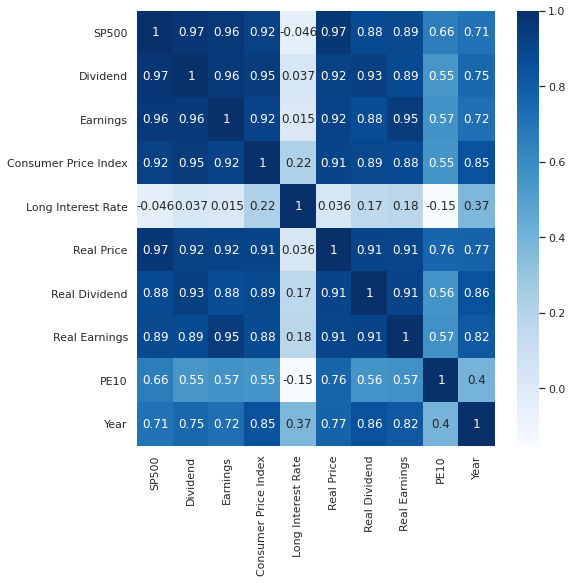

In [26]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.drop(["Year"], axis=1).corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

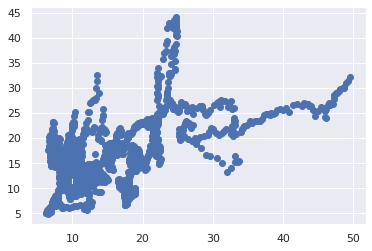

In [31]:
plt.scatter(df["Real Dividend"], df["PE10"])

Text(0, 0.5, 'Real Price')

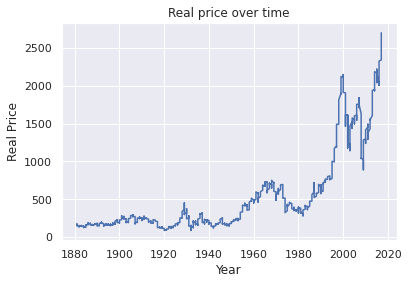

In [11]:
plt.title("Real price over time")
plt.plot(df["Year"], df["Real Price"])
plt.xlabel("Year")
plt.ylabel("Real Price")

Text(0, 0.5, 'Real Earnings')

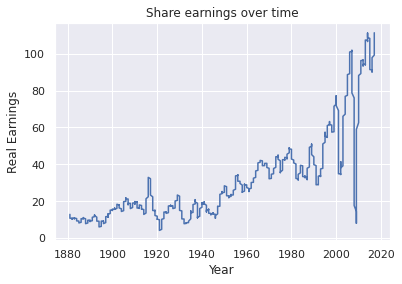

In [12]:
plt.title("Share earnings over time")
plt.plot(df["Year"], df["Real Earnings"])
plt.xlabel("Year")
plt.ylabel("Real Earnings")

Text(0, 0.5, 'CAPE')

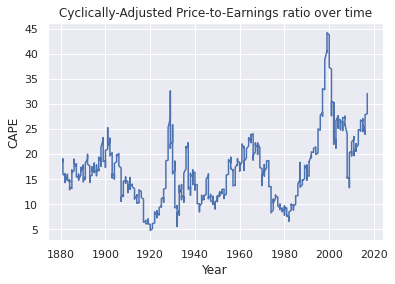

In [13]:
plt.title("Cyclically-Adjusted Price-to-Earnings ratio over time")
plt.plot(df["Year"], df["PE10"])
plt.xlabel("Year")
plt.ylabel("CAPE")

In [14]:
growth_rate = (df["SP500"][1643] - df["SP500"][0]) / df["SP500"][0]
print(growth_rate)

429.4264943457189


## Great Depression

In [15]:
new_df = df[df.Year.between(1929, 1939)]

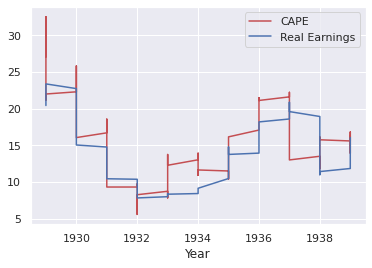

In [16]:
plt.plot(new_df["Year"], new_df["PE10"], 'r-', label="CAPE")
plt.plot(new_df["Year"], new_df["Real Earnings"], 'b-', label="Real Earnings")
plt.legend(loc='best')
plt.xlabel("Year")
plt.show()

Text(0, 0.5, 'Real Price')

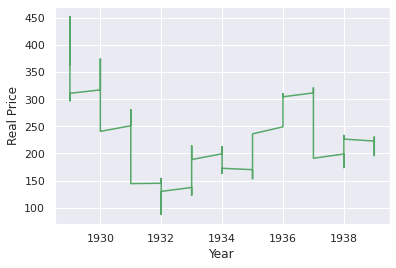

In [17]:
plt.plot(new_df["Year"], new_df["Real Price"], 'g-')
plt.xlabel("Year")
plt.ylabel("Real Price")

## 1973–1974 stock market crash

In [18]:
new_df_smc = df[df.Year.between(1973, 1974)]

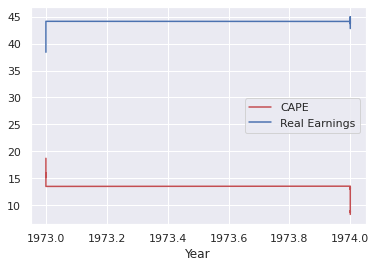

In [19]:
plt.plot(new_df_smc["Year"], new_df_smc["PE10"], 'r-', label="CAPE")
plt.plot(new_df_smc["Year"], new_df_smc["Real Earnings"], 'b-', label="Real Earnings")
plt.legend(loc='best')
plt.xlabel("Year")
plt.show()

Text(0, 0.5, 'Real Price')

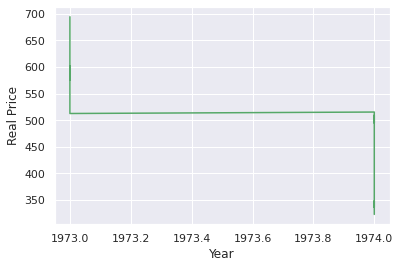

In [20]:
plt.plot(new_df_smc["Year"], new_df_smc["Real Price"], 'g-')
plt.xlabel("Year")
plt.ylabel("Real Price")

## Financial crisis of 2007–2008

In [21]:
new_df_fc = df[df.Year.between(2007, 2008)]

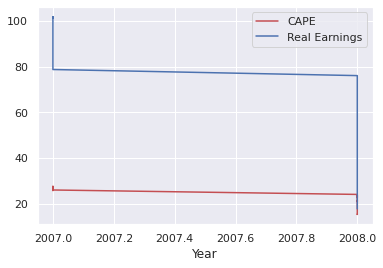

In [22]:
plt.plot(new_df_fc["Year"], new_df_fc["PE10"], 'r-', label="CAPE")
plt.plot(new_df_fc["Year"], new_df_fc["Real Earnings"], 'b-', label="Real Earnings")
plt.legend(loc='best')
plt.xlabel("Year")
plt.show()

Text(0, 0.5, 'Real Price')

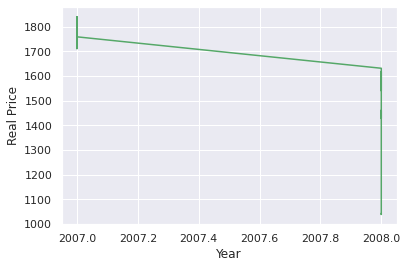

In [23]:
plt.plot(new_df_fc["Year"], new_df_fc["Real Price"], 'g-')
plt.xlabel("Year")
plt.ylabel("Real Price")

Text(0, 0.5, 'SP500')

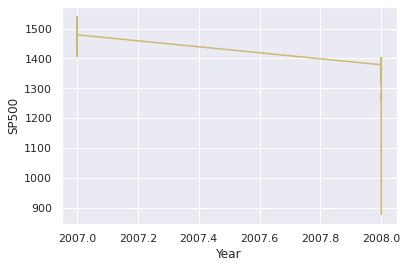

In [24]:
plt.plot(new_df_fc["Year"], new_df_fc["SP500"], 'y-')
plt.xlabel("Year")
plt.ylabel("SP500")